# CS-UY 3943 - Introduction of Data Science
## Final Project: Tweet Sentiment Extraction

Please edit the cell below to add your name, NetID, assigned group, and group members for this assignment. **Complete this section before proceeding to the assignment questions.**

Name:  Taylor Wong
NetID:  tw1835
Group Member 1:  Thomas Scarola
NetID:  tws285
***

# Preliminary Data Analysis

#### Include 1 or 2 plots or data tables that demonstrate initial EDA efforts


1\. Read the data file `train.csv` into your program as a `pandas` `DataFrame`

In [1]:
#Place your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('train.csv')

# dropping ticket, cabin, name -- missing a lot of data, dont contribute much
# cabin -- captured in pclass and fare
# ticket -- each unique 
# name -- each unique
df = df.drop(labels=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

df.head(10).sort_values('Survived')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


<hr />

2a. Graphical EDA: Categorical Features -- Display the different percentages of each feature in the total data (What percentage of each feature survived? What percentage did not?)

Pclass, Sex, SibSp, Parch, Embarked (Note: including SibSp, Parch since they have a small range)


Text(0.5, 1.01, 'Percentage of Surivors by Embarking Destination')

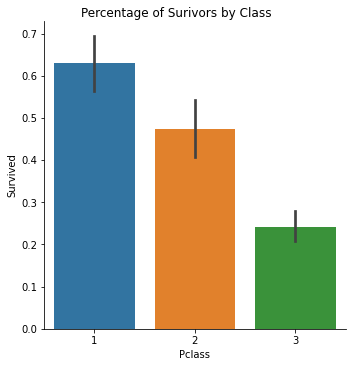

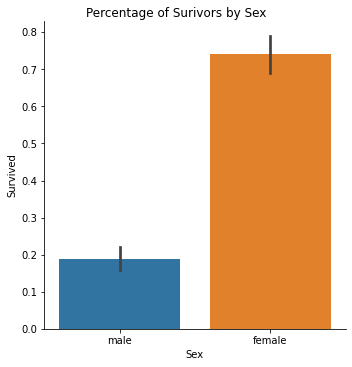

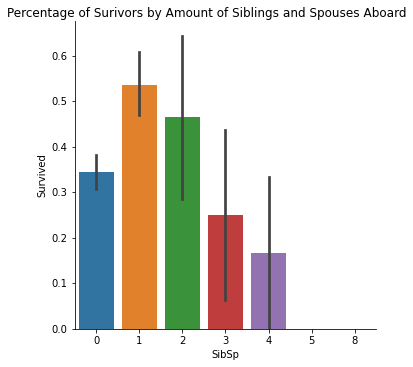

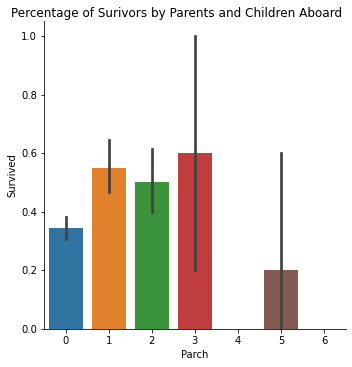

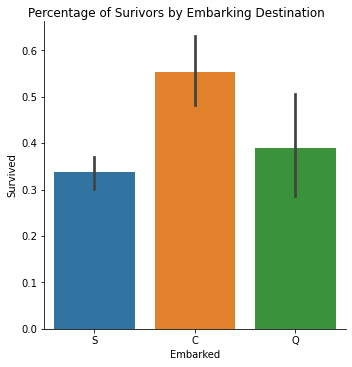

In [2]:
# categorical data EDA (Pclass, Sex, SibSp, Parch, Embarked)

# plot the percentage of people that survived based on class
class_plot = sns.catplot(data=df, x='Pclass', y='Survived', kind='bar', margin_titles=True)
class_plot.fig.suptitle('Percentage of Surivors by Class', y=1.01)

# plot the percentage of people that survived based on gender
sex_plot = sns.catplot(data=df, x='Sex', y='Survived', kind='bar', margin_titles=True)
sex_plot.fig.suptitle('Percentage of Surivors by Sex', y=1.01)

# plot the percentage of people that survived based on the number of siblings or spouses they had
sibsp_plot = sns.catplot(data=df, x='SibSp', y='Survived', kind='bar', margin_titles=True)
sibsp_plot.fig.suptitle('Percentage of Surivors by Amount of Siblings and Spouses Aboard', y=1.01)

# plot the percentage of people that survived based on the number of parents or children they had
parch_plot = sns.catplot(data=df, x='Parch', y='Survived', kind='bar', margin_titles=True)
parch_plot.fig.suptitle('Percentage of Surivors by Parents and Children Aboard', y=1.01)

# plot the percentage of people that survived based on where they embarked from 
embarked_plot = sns.catplot(data=df, x='Embarked', y='Survived', kind='bar', margin_titles=True)
embarked_plot.fig.suptitle('Percentage of Surivors by Embarking Destination', y=1.01)

2b. Graphical EDA: For continuous variables (Age, Fare), plot distributions of survival --> ECDF



Text(0.5, 1.01, 'Distribution of Surivors by Fare')

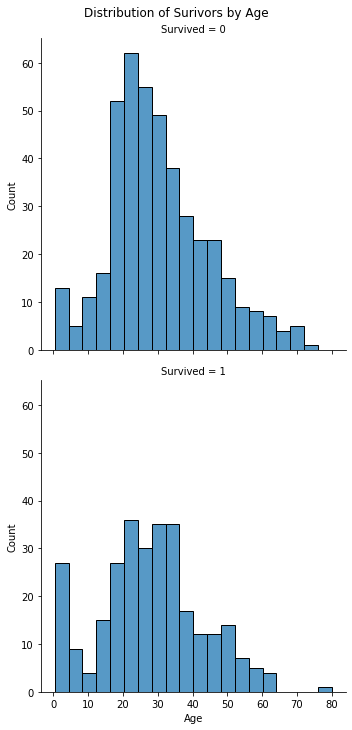

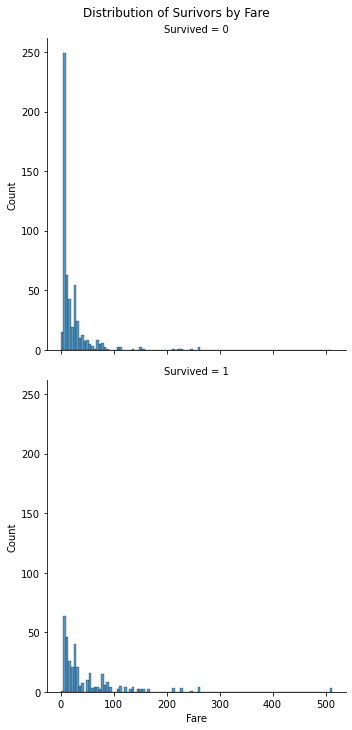

In [3]:
# continuous data EDA (Age, Fare) 
# plot the distribution of people that survived based on their ages
age_plot = sns.displot(data=df, x='Age', kind='hist', row='Survived', palette='bright')
age_plot.fig.suptitle('Distribution of Surivors by Age', y=1.01)

fare_plot = sns.displot(data=df, x='Fare', kind='hist', row='Survived', palette='bright')
fare_plot.fig.suptitle('Distribution of Surivors by Fare', y=1.01)


Quantitative EDA -- Summary Statistics (mean, median, std)
https://campus.datacamp.com/courses/statistical-thinking-in-python-part-2/introduction-to-hypothesis-testing?ex=1

#### Brief discussion of what EDA has revealed about the data

<p>
<span style="color:blue">
    <b>IGNORE!</b>
    <br>
    Most influential in determining survival: gender, socio-economic class (Pclass), fare:
    <br><br>
    1. Gender: women 
    <br>
    2. Pclass: upper class (=1, middle=2, lower=3; negative correlation)
    <br>
    3. Fare: those who bought more expensive tickets (related to Pclass; rooms on higher decks)
    <br>
    About 70% of the survivors were female
    <br>
    A vast majority of the people who did not survive were in the lower class, and between the ages of 20 to 30
</span>
</p>

# Acutal Data Analysis

## Preprocessing

Converting categorical data to dummies (aka making them into individual columns)

In [4]:
# convert categorical data to dummies, including Pclass (since its actually categorical, represented by numbers)
df_origin = df
df_origin['Pclass'] = pd.Categorical(df_origin.Pclass)
df_origin = pd.get_dummies(df_origin)
df_origin

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,0,1,0,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,1,0,0,0,1
888,0,NaN,1,2,23.4500,0,0,1,1,0,0,0,1
889,1,26.0,0,0,30.0000,1,0,0,0,1,1,0,0


Fill in missing age data with the average age

In [5]:
# note: missing age data --> fill in with average ages
# df_origin.isna().sum()

df_origin['Age'] = df_origin['Age'].fillna(np.mean(df_origin['Age']))
df_origin

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.000000,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.000000,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.000000,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.000000,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,0,1,0,0,1,0,0,1
887,1,19.000000,0,0,30.0000,1,0,0,1,0,0,0,1
888,0,29.699118,1,2,23.4500,0,0,1,1,0,0,0,1
889,1,26.000000,0,0,30.0000,1,0,0,0,1,1,0,0


## Hypothesis Testing

In [6]:
def permutation_sample(data1, data2):
    #"""Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

# permutation replicate: test statistic generated from permutation sample
def draw_perm_reps(data_1, data_2, func, size=1):
    #"""Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [7]:
def bootstrap_replicate_1d(data, func):
    #"""Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    #"""Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [8]:
# Helper Functions

def frac_survivors(group1, group2):
    #"""Compute fraction of Group1 survivors."""
    frac = np.sum(group1) / len(group1)
    return frac

def num_total_and_survived_passengers(passenger_df):
    num_passengers = len(passenger_df)
    num_survived_passengers = np.sum(passenger_df['Survived'])
    return (num_passengers, num_survived_passengers)

def categorical_hypothesis_test(group1_df, group2_df):
    
    # Get number of total and survived passengers for each group
    num_group1_passengers, num_group1_survived = num_total_and_survived_passengers(group1_df)
    num_group2_passengers, num_group2_survived = num_total_and_survived_passengers(group2_df)
    
    # Construct arrays of data: males and females
    group1 = np.array([True] * num_group1_survived + [False] * (num_group1_passengers - num_group1_survived))
    group2 = np.array([True] * num_group2_survived + [False] * (num_group2_passengers - num_group2_survived))
    
    # Acquire permutation samples: perm_replicates
    perm_replicates = draw_perm_reps(group1, group2, frac_survivors, 10000)
    
    # Compute and print p-value: p
    p = np.sum(perm_replicates >= num_group1_survived/num_group1_passengers) / len(perm_replicates)
    print('p-value =', p)



### Gender

Null hypothesis: There is no difference in survival

Test statistic: # Female Survivors / Total Female Passengers

If gender did not impact survival --> large number of bootstrap 
replicates with a proportion of female survivors (test statistic)
at least as large as the one observed in the data

AKA p-value (probability of above)
- small: data are statistically significantly different than what's observed under the null hypothesis (null hypothesis circumstances are different than the actual circumstances)

In [9]:
# df all female passgengers
female_passengers = df_origin[df_origin['Sex_female'] == 1]
# number of female passengers, number of female passengers who survived
num_female_passengers, num_female_survived = num_total_and_survived_passengers(
    female_passengers)

In [10]:
# df all male passengers
male_passengers = df_origin[df_origin['Sex_male'] == 1]
# number of male passengers, number of male passengers who survived
num_male_passengers, num_male_survived = num_total_and_survived_passengers(
    male_passengers)

In [11]:
print('Observed Test Statistic: ', 
      num_female_survived / num_female_passengers)

Observed Test Statistic:  0.7420382165605095


In [12]:
# Construct arrays of data: males and females
females = np.array([True] * num_female_survived + [False] * (num_female_passengers - num_female_survived))
males = np.array([True] * num_male_survived + [False] * (num_male_passengers - num_male_survived))

# Acquire permutation samples: perm_replicates
gender_perm_replicates = draw_perm_reps(females, males, frac_survivors, 10000)

# Compute and print p-value: p
gender_p = np.sum(gender_perm_replicates >= num_female_survived/num_female_passengers) / len(gender_perm_replicates)
print('Gender p-value =', gender_p)

Gender p-value = 0.0


In [13]:
categorical_hypothesis_test(female_passengers, male_passengers)

p-value = 0.0


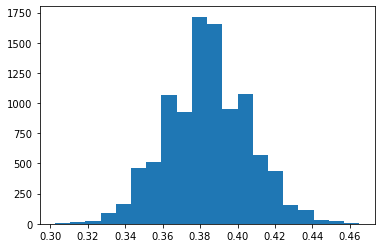

In [14]:
_ = plt.hist(gender_perm_replicates, bins=20)

<p>
<span style="color:blue">
    Our p-value IS signficantly small, meaning the data observed under the null hypothesis is statistically significantly different from the actual/observed data. Therefore we can reject the nully hypothesis that there is no difference in survival based on gender, and say that there IS a difference in survival based on gender.    
    <br><br>
    As a result, gender is a significant feature in predicting survival.
    </span>

</p>


### Class

Null hypothesis: There is no difference in class survival

Test statistic: # Pclass1 Survivors / Total Pclass1 Passengers

In [15]:
# df all Pclass1 passgengers
Pclass1_passengers = df_origin[df_origin['Pclass_1'] == 1]
# number of Pclass1 passengers
num_Pclass1_passengers = len(Pclass1_passengers)
# number of Pclass1 passengers who survived
num_Pclass1_survived = np.sum(Pclass1_passengers['Survived'])

In [16]:
# df all Pclass2+Pclass3 passengers
Pclass23_passengers = df_origin[(df_origin['Pclass_2'] == 1) | (df_origin['Pclass_3'] == 1)]
# number of Pclass2+Pclass3 passengers
num_Pclass23_passengers = len(Pclass23_passengers)
# number of Pclass2+Pclass3 passengers who survived
num_Pclass23_survived = np.sum(Pclass23_passengers['Survived'])

In [17]:
print('Observed Test Statistic: ', 
      num_Pclass1_survived / num_Pclass1_passengers)

Observed Test Statistic:  0.6296296296296297


In [18]:
# Construct arrays of data: pclass1 and pclass23
pclass1 = np.array([True] * num_Pclass1_survived + [False] * (num_Pclass1_passengers - num_Pclass1_survived))
pclass23 = np.array([True] * num_Pclass23_survived + [False] * (num_Pclass23_passengers - num_Pclass23_survived))

# Acquire permutation samples: perm_replicates
pclass_perm_replicates = draw_perm_reps(pclass1, pclass23, frac_survivors, 10000)

# Compute and print p-value: p
pclass_p = np.sum(pclass_perm_replicates >= num_Pclass1_survived/num_Pclass1_passengers) / len(pclass_perm_replicates)
print('p-value =', pclass_p)

p-value = 0.0


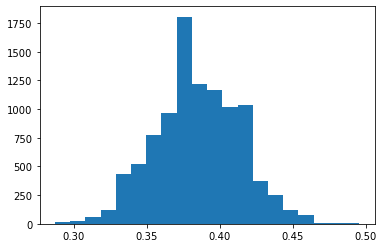

In [19]:
_ = plt.hist(pclass_perm_replicates, bins=20)

<p>
<span style="color:blue">
    Our p-value IS signficantly small, meaning the data observed under the null hypothesis is statistically significantly different from the actual/observed data. Therefore we can reject the nully hypothesis that there is no difference in survival based on class, and say that there IS a difference in survival based on class.
    <br><br>
    As a result, class is a significant feature in predicting survival.
    </span>
</p>

### Embarked

Null hypothesis: There is no difference in Embarked location survival

Test statistic: # Embarked_C Survivors / Total Embarked_C Passengers

In [20]:
# df all Embarked_C passgengers
Embarked_C_passengers = df_origin[df_origin['Embarked_C'] == 1]
# number of Embarked_C passengers
num_Embarked_C_passengers = len(Embarked_C_passengers)
# number of Embarked_C passengers who survived
num_Embarked_C_survived = np.sum(Embarked_C_passengers['Survived'])

In [21]:
# df all Embarked_Q + Embarked_S passgengers
Embarked_QS_passengers = df_origin[(df_origin['Embarked_Q'] == 1) | (df_origin['Embarked_S'] == 1)]
# number of Embarked_Q + Embarked_S passengers
num_Embarked_QS_passengers = len(Embarked_QS_passengers)
# number of Embarked_Q + Embarked_S passengers who survived
num_Embarked_QS_survived = np.sum(Embarked_QS_passengers['Survived'])

In [22]:
print('Observed Test Statistic: ', 
      num_Embarked_C_survived / num_Embarked_C_passengers)

Observed Test Statistic:  0.5535714285714286


In [23]:
# Construct arrays of data: pclass1 and pclass23
ec = np.array([True] * num_Embarked_C_survived + [False] * (num_Embarked_C_passengers - num_Embarked_C_survived))
eqs = np.array([True] * num_Embarked_QS_survived + [False] * (num_Embarked_QS_passengers - num_Embarked_QS_survived))

# Acquire permutation samples: perm_replicates
embarked_perm_replicates = draw_perm_reps(ec, eqs, frac_survivors, 10000)

# Compute and print p-value: p
embarked_p = np.sum(embarked_perm_replicates >= num_Embarked_C_survived / num_Embarked_C_passengers) / len(embarked_perm_replicates)
print('p-value =', embarked_p)

p-value = 0.0


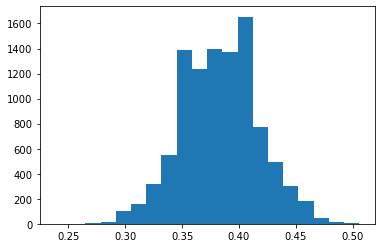

In [24]:
_ = plt.hist(embarked_perm_replicates, bins=20)

<p>
<span style="color:blue">
    Our p-value IS signficantly small, meaning the data observed under the null hypothesis is statistically significantly different from the actual/observed data. Therefore we can reject the nully hypothesis that there is no difference in survival based on embark location, and say that there IS a difference in survival based on embark location.
    <br><br>
    As a result, embark location is a significant feature in predicting survival.
    </span>
</p>

### Sibsp

Null hypothesis: There is no difference in survival based on number of siblings/spouses --> Survivors and non-survivors have identical sibling/spouse distributions

Test statistic: mean(sibsp of survivors) - mean(sibsp of non-survivors)

In [54]:
# Get col of survivors sibsp
survivors_sibsp = df_origin[df_origin['Survived'] == 1]['SibSp']
# Get col of non-survivors sibsp
non_survivors_sibsp = df_origin[df_origin['Survived'] == 0]['SibSp']

# Generate a lot of replicates 
survivor_sibsp_replicates = draw_bs_reps(survivors_sibsp, np.mean, 10000)
nonsurvivor_sibsp_replicates = draw_bs_reps(non_survivors_sibsp, np.mean, 10000)

# Calculate test statistics 
bs_test_stats = survivor_sibsp_replicates - nonsurvivor_sibsp_replicates # array of mean differences between both bs sample
observed_test_stats = np.mean(survivors_sibsp) - np.mean(non_survivors_sibsp)

p_value = np.sum(bs_test_stats <= observed_test_stats) / 10000
p_value 


0.4953

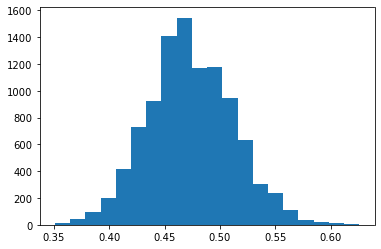

In [55]:
_ = plt.hist(survivor_sibsp_replicates, bins=20)

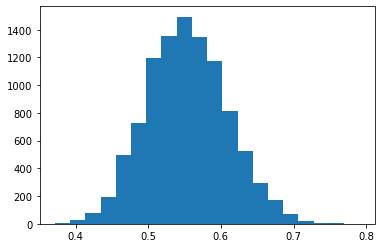

In [56]:
_ = plt.hist(nonsurvivor_sibsp_replicates, bins=20)

<p>
<span style="color:blue">
    Our p-value is not signficantly small (0.4957). If it was, we could outright say that the null hypothesis is false. However, because the p-value is not significantly small, we cannot say whether or not it is certainly true or false. (i.e. we cannot reject the null hypothesis, i.e. we cannot say for certain that there is no difference in survival based on sibsp)
</span>
</p>

### Age

Null hypothesis: There is no difference in survival based on age --> Survivors and non-survivors have identical age distributions

Test statistic: mean(age of survivors) - mean(age of non-survivors)

In [26]:
# Get col of survivors age
survivors_age = df_origin[df_origin['Survived'] == 1]['Age']
# Get col of non-survivors age
non_survivors_age = df_origin[df_origin['Survived'] == 0]['Age']

# Generate a lot of replicates 
survivor_age_replicates = draw_bs_reps(survivors_age, np.mean, 10000)
nonsurvivor_age_replicates = draw_bs_reps(non_survivors_age, np.mean, 10000)

# Calculate test statistics 
bs_test_stats = survivor_age_replicates - nonsurvivor_age_replicates # array of mean differences between both bs sample
observed_test_stats = np.mean(survivors_age) - np.mean(non_survivors_age)

p_value = np.sum(bs_test_stats <= observed_test_stats) / 10000
p_value 


0.4911

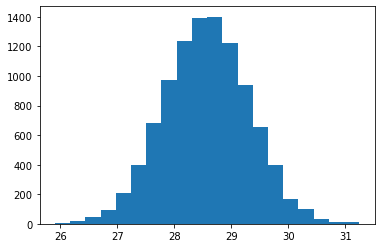

In [47]:
_ = plt.hist(survivor_age_replicates, bins=20)

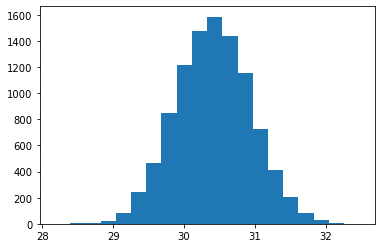

In [46]:
_ = plt.hist(nonsurvivor_age_replicates, bins=20)

<p>
<span style="color:blue">
    Our p-value is not signficantly small (0.5059). If it was, we could outright say that the null hypothesis is false. However, because the p-value is not significantly small, we cannot say whether or not it is certainly true or false. (i.e. we cannot reject the null hypothesis, i.e. we cannot say for certain that there is no difference in survival based on age)
</span>
</p>

### Fare

Null hypothesis: There is no difference in survival based on fare --> Survivors and non-survivors have identical fare distributions

Test statistic: mean(fare of survivors) - mean(fare of non-survivors)

In [43]:
# Get col of survivors fare
survivors_fare = df_origin[df_origin['Survived'] == 1]['Fare']
# Get col of non-survivors fare
non_survivors_fare = df_origin[df_origin['Survived'] == 0]['Fare']

# Generate a lot of replicates 
survivor_fare_replicates = draw_bs_reps(survivors_fare, np.median, 10000)
nonsurvivor_fare_replicates = draw_bs_reps(non_survivors_fare, np.median, 10000)

# Calculate test statistics 
bs_test_stats = survivor_fare_replicates - nonsurvivor_fare_replicates # array of median differences between both bs sample
observed_test_stats = np.median(survivors_fare) - np.median(non_survivors_fare)

p_value = np.sum(bs_test_stats <= observed_test_stats) / 10000
p_value 


0.5118

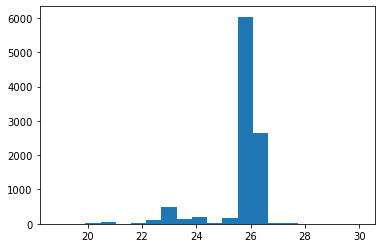

In [44]:
_ = plt.hist(survivor_fare_replicates, bins=20)

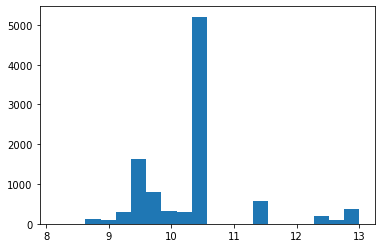

In [45]:
_ = plt.hist(nonsurvivor_fare_replicates, bins=20)

<p>
<span style="color:blue">
    Our p-value is not signficantly small (0.5158). If it was, we could outright say that the null hypothesis is false. However, because the p-value is not significantly small, we cannot say whether or not it is certainly true or false. (i.e. we cannot reject the null hypothesis, i.e. we cannot say for certain that there is no difference in survival based on fare)
</span>
</p>

## Build Logistic Regression Models

### Split data into train & test

In [28]:
from sklearn.model_selection import train_test_split

y = df_origin.Survived
X = df_origin.drop(columns='Survived')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Build models: SVC, LogisticRegression
(Based on Training Data)

#### Build SVC Model

In [29]:
# perform logistic regression using SVC
from sklearn.svm import SVC
svm = SVC(random_state=42) # default hyperparameters --> kernel='linear', 
svm.fit(X_train, y_train)
print("SVC Accuracy: ", svm.score(X_train, y_train)) # accuracy 

SVC Accuracy:  0.6699438202247191


#### Build Logistic Regression Model

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg', random_state=42)
lr.fit(X_train, y_train)
print("LogisticRegression Accuracy: ", lr.score(X_train, y_train)) # accuracy 

LogisticRegression Accuracy:  0.8061797752808989


## Optimize models: Cross Validation of Regularization
(Model built using Training Data, using this model since it has the highest confidence interval)

In [31]:
# from sklearn.model_selection import cross_val_score
# # params: regressor, feature data, target data, cv=number of folds
# # returns: array of cross-validation scores, length of array = numner of folds
# svm_cv_results = cross_val_score(svm, X, y, cv=5) 
# np.mean(svm_cv_results)

In [32]:
# lr_cv_results = cross_val_score(lr, X, y, cv=5) 
# np.mean(lr_cv_results)

### Hyperparameter tuning: RandomizedSearchCV of Regularization "C" Variable

In [33]:
### RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
# Hyperparameters as a dictionary
param_dist = {'C': randint(1200, 1400)}
# Pass our model, the grid to tune over, and the number of folds to use
# returns GridSearch object
svm_cv = RandomizedSearchCV(svm, param_dist, cv=10)
# use GridSearch object to fit the data and this fit performs the actual grid search in place
svm_cv.fit(X_train, y_train)
# Retreive hyperparameters that perform best
print("SVM: C value that performed the best: ", svm_cv.best_params_)
# Mean cross validation score over that fold
print("SVM: Mean cross validation score over that fold: ", svm_cv.best_score_)

SVM: C value that performed the best:  {'C': 1246}
SVM: Mean cross validation score over that fold:  0.8062010954616587


In [34]:
from scipy.stats import uniform
lr_param_dist = {'C': uniform(0.02, 0.04)}
lr_cv = RandomizedSearchCV(lr, lr_param_dist, cv=10)
# use GridSearch object to fit the data and this fit performs the actual grid search in place
lr_cv.fit(X_train, y_train)
# Retreive hyperparameters that perform best
print("LogisticRegression: C value that performed the best: ", lr_cv.best_params_)
# Mean cross validation score over that fold
print("LogisticRegression: Mean cross validation score over that fold: ", lr_cv.best_score_)

LogisticRegression: C value that performed the best:  {'C': 0.04628942507010084}
LogisticRegression: Mean cross validation score over that fold:  0.8075704225352112


### Build new, optimized models with tuned regularization values

#### Build SVC Model

In [35]:
# perform logistic regression using SVC
optimized_svm = SVC(C=1385, random_state=42) # kernel="linear" --> for coef_
optimized_svm.fit(X_train, y_train)
print("SVC Accuracy: ", optimized_svm.score(X_train, y_train)) # accuracy 

SVC Accuracy:  0.8384831460674157


#### Build LogisticRegression Model

In [36]:
optimized_lr = LogisticRegression(C=0.03, solver='newton-cg', random_state=42)
optimized_lr.fit(X_train, y_train)
print("LogisticRegression Accuracy: ", optimized_lr.score(X_train, y_train)) # accuracy 


LogisticRegression Accuracy:  0.8146067415730337


#### Plotting ROC Curve

#### Area under the ROC curve (AUC)


<p>
<span style="color:blue">
TRY DIFFERNT FOLDS
</span>
</p>

## Investigating important features

In [37]:
abs(optimized_lr.coef_)

array([[0.02041673, 0.21655769, 0.04913494, 0.00853254, 0.25026786,
        0.18889626, 0.43916329, 0.78989028, 0.78988945, 0.11830947,
        0.02134598, 0.15503516]])

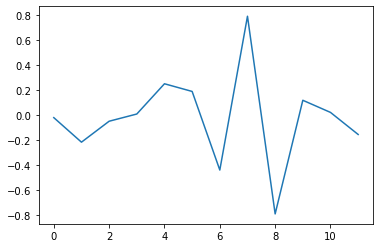

In [38]:
plt.plot(optimized_lr.coef_.flatten())

In [39]:
abs(optimized_svm.coef_)

AttributeError: coef_ is only available when using a linear kernel

sgd classifier, does have coef_
- use svm or logreg using smae underlying scikit learn class, change loss function
- loss = hinge, same as svc --> faster 